# Notebook made specifically for Helena and her plots

In [1]:
import sys,os,os.path
sys.path.append("../../") # if you move files around, you need to adjust this!
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

#%load_ext autoreload
#%autoreload 2
#%matplotlib notebook
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib import rcParams

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio

from IC.invisible_cities.cities                 import beersheba as beerfun

from IC.invisible_cities.evm.event_model                          import HitCollection

from IC.invisible_cities.database.load_db       import DataSiPM

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.evm.event_model        import HitEnergy
from IC.invisible_cities.cities.beersheba          import DeconvolutionMode
from IC.invisible_cities.cities.beersheba          import CutType

from IC.invisible_cities.reco import hits_functions as hif

from IC.invisible_cities.reco.deconv_functions import deconvolve
from IC.invisible_cities.reco.deconv_functions import deconvolution_input
from IC.invisible_cities.reco.deconv_functions import InterpolationMethod

import IC.invisible_cities.io.mcinfo_io as mcio

from collections import defaultdict

import matplotlib.cm as cm
from matplotlib.colors import Normalize

pd.set_option('display.max_rows', 200)

import imageio

import functions as func


In [2]:
from cycler import cycler

color_sequence = ("k", "m", "g", "b", "r",
                  "gray", "aqua", "gold", "lime", "purple",
                  "brown", "lawngreen", "tomato", "lightgray", "lightpink")

def auto_plot_style(overrides = dict()):
    plt.rcParams[ "figure.figsize"               ] = 10, 8
    plt.rcParams[   "font.size"                  ] = 25
    plt.rcParams[  "lines.markersize"            ] = 25
    plt.rcParams[  "lines.linewidth"             ] = 3
    plt.rcParams[  "patch.linewidth"             ] = 3
    plt.rcParams[   "axes.linewidth"             ] = 2
    plt.rcParams[   "grid.linewidth"             ] = 3
    plt.rcParams[   "grid.linestyle"             ] = "--"
    plt.rcParams[   "grid.alpha"                 ] = 0.5
    plt.rcParams["savefig.dpi"                   ] = 300
    plt.rcParams["savefig.bbox"                  ] = "tight"
    plt.rcParams[   "axes.formatter.use_mathtext"] = True
    plt.rcParams[   "axes.formatter.limits"      ] = (-3 ,4)
    plt.rcParams[  "xtick.major.size"            ] = 10
    plt.rcParams[  "ytick.major.size"            ] = 10
    plt.rcParams[  "xtick.minor.size"            ] = 5
    plt.rcParams[  "ytick.minor.size"            ] = 5
    plt.rcParams[   "axes.prop_cycle"            ] = cycler(color=color_sequence)
    plt.rcParams[  "image.cmap"                  ] = "gnuplot2"
    plt.rcParams.update(overrides)


auto_plot_style()

In [3]:
alpha_evt = 759740
de_evt    = 766817

In [4]:
file_path = '/home/e78368jw/Downloads/test_data/sop/'
file_names = [f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f)) and f.endswith('.h5')]

for file in file_names:
    soph_file = file_path + file#f'/home/e78368jw/Documents/NEXT_CODE/next_misc/energy_topology_study/testing_data/sophronia_' + str(FILE_NUMBER) + '_208Tl.h5'
    soph_hdst = dstio.load_dst(soph_file, 'RECO', 'Events')#CHITS/lowTh
    number_of_interest = alpha_evt
    if number_of_interest in (soph_hdst.event.unique()):
        alpha_file = soph_file
        break

for file in file_names:
    soph_file = file_path + file#f'/home/e78368jw/Documents/NEXT_CODE/next_misc/energy_topology_study/testing_data/sophronia_' + str(FILE_NUMBER) + '_208Tl.h5'
    soph_hdst = dstio.load_dst(soph_file, 'RECO', 'Events')#CHITS/lowTh
    number_of_interest = de_evt
    if number_of_interest in (soph_hdst.event.unique()):
        de_file = soph_file
        break

# PLOT ALPHA

First on its own, then wrt XY geometry

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
1627,759740,1.742945e+09,0,7.967181,-87.181131,1,-297.025,75.375,0.0,0.0,928.859125,5.409806,-4.149327,-1.0,-0.000012,-1,-1.0
1628,759740,1.742945e+09,0,7.967181,-87.181131,1,104.275,-464.375,0.0,0.0,928.859125,5.686775,-4.361763,-1.0,-0.000015,-1,-1.0
1629,759740,1.742945e+09,0,7.967181,-87.181131,1,26.525,-263.225,0.0,0.0,928.859125,5.923001,-4.542949,-1.0,-0.000013,-1,-1.0
1630,759740,1.742945e+09,0,7.967181,-87.181131,1,-19.125,492.725,0.0,0.0,931.851250,5.096422,83.881361,-1.0,NaN,-1,-1.0
1631,759740,1.742945e+09,0,7.967181,-87.181131,1,119.825,75.875,0.0,0.0,931.851250,5.028828,82.768839,-1.0,0.000236,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,759740,1.742945e+09,4,153.062807,175.072465,1,381.175,307.625,0.0,0.0,2725.037000,8.748800,40.876313,-1.0,NaN,-1,-1.0
11134,759740,1.742945e+09,4,153.062807,175.072465,1,288.875,276.525,0.0,0.0,2728.090500,5.472166,15.452206,-1.0,0.000060,-1,-1.0
11135,759740,1.742945e+09,4,153.062807,175.072465,1,319.975,292.075,0.0,0.0,2728.090500,5.119298,14.455784,-1.0,0.000060,-1,-1.0
11136,759740,1.742945e+09,4,153.062807,175.072465,1,366.625,276.525,0.0,0.0,2728.090500,8.634259,24.381270,-1.0,0.000101,-1,-1.0


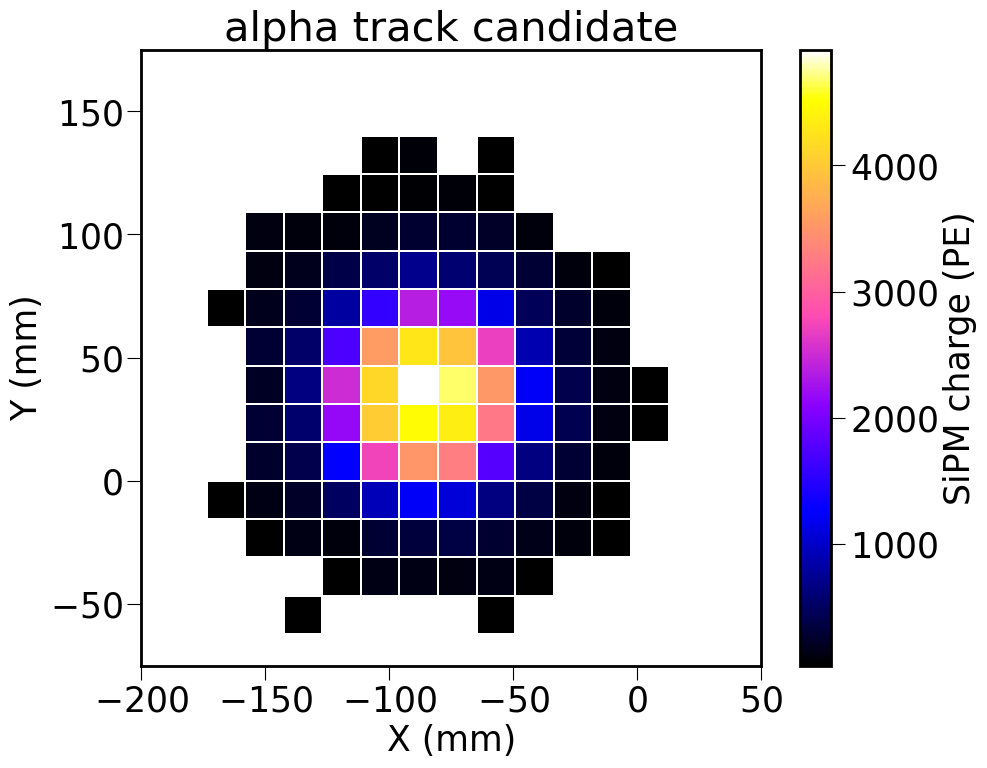

In [5]:
alpha_hits = pd.read_hdf(alpha_file, 'RECO/Events')
evt = number_of_interest
pitch = 15.55

filtered_evt = alpha_hits[alpha_hits.event == alpha_evt]
display(filtered_evt)
#filtered_evt = this_evt_true_info[(this_evt_true_info.X > 0)]
#filtered_evt = filtered_evt[(filtered_evt.X < 400)]
#filtered_evt = filtered_evt[(filtered_evt.X > 50)]
#filtered_evt = filtered_evt[(filtered_evt.Y > -200)]
#filtered_evt = filtered_evt[(filtered_evt.Y < 100)]
#filtered_evt = filtered_evt[(filtered_evt.Z > 1600)]
#filtered_evt = filtered_evt[(filtered_evt.Z < 1800)]
filtered_evt = filtered_evt[filtered_evt.Q > 35]

plt.figure(figsize = (10,8))

xx = np.arange(filtered_evt.X.min(), filtered_evt.X.max() + pitch, pitch)
yy = np.arange(filtered_evt.Y.min(), filtered_evt.Y.max() + pitch, pitch)
zz = filtered_evt.Z.unique()

xx_MC = xx
yy_MC = yy
zz_MC = zz

energy_hist = plt.hist2d(filtered_evt.X, filtered_evt.Y, bins=[xx, yy], weights=filtered_evt.Q, cmin=0.0001, edgecolors = 'w', linewidths = 0.05);
plt.xlabel('X (mm)');
#plt.ylabel('Y (mm)');
plt.ylabel('Y (mm)');
cbar = plt.colorbar(energy_hist[3])
cbar.set_label('SiPM charge (PE)')
#plt.hist2d(filtered_evt.X, filtered_evt.Z, bins=[xx, zz], weights=filtered_evt.Q, cmin=0.0001);
#plt.set_xlabel('X (mm)');
#plt.set_ylabel('Z (mm)');
plt.xlim([-200, 50])
plt.ylim([-75, 175])


plt.title('alpha track candidate', fontsize=30)
plt.savefig(f'nice_plots/alpha_candidate_evt{alpha_evt}.pdf')

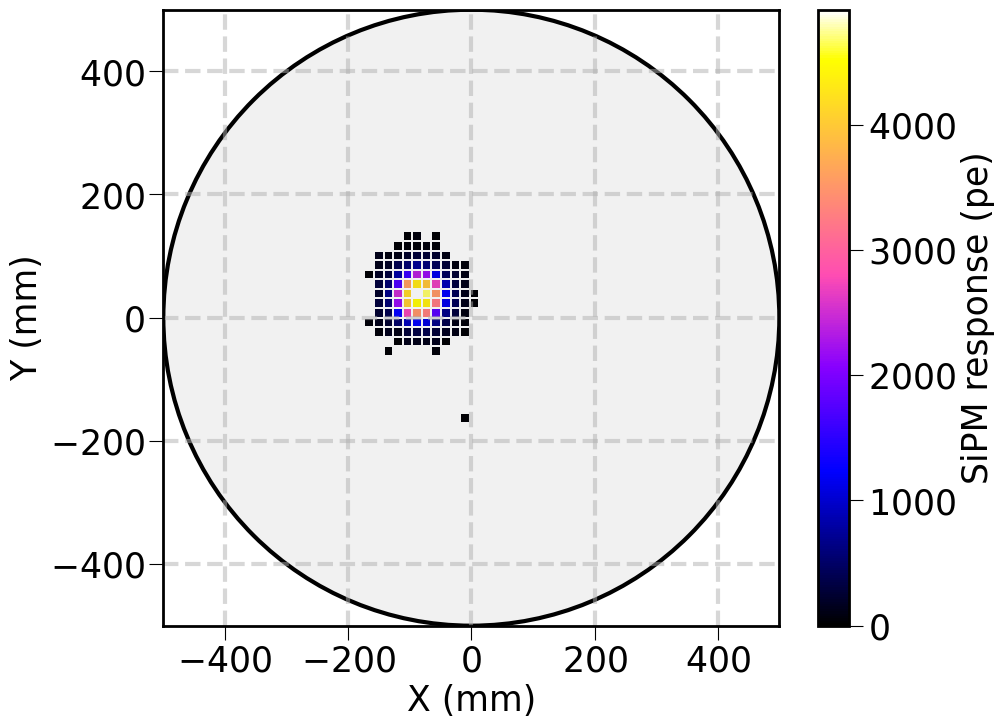

In [6]:
plt.figure(figsize=(10,8))
c = plt.Circle((0,0), 500, facecolor=(.1, .1, .1, .06), edgecolor="k")
plt.gca().add_patch(c)
#filtered_evt = filtered_evt[(filtered_evt.Y > -200)]
energy_hist = plt.hist2d(filtered_evt.X, filtered_evt.Y, bins=[xx, yy], weights=filtered_evt.Q, vmin = 0, cmin=0.0001, edgecolors = 'w', linewidths = 0.05);
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.xticks(np.arange(-400, 401, 200))
plt.yticks(np.arange(-400, 401, 200))
plt.xlim(-500, 500)
plt.ylim(-500, 500)
plt.gca().set_aspect(1)
plt.colorbar().set_label("SiPM response (pe)")
plt.grid()

plt.savefig(f'nice_plots/alpha_candidate_evt{alpha_evt}_geometry.pdf')
plt.show()

# PLOT DEP

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,766817,1.742945e+09,0,144.042798,53.461312,1,134.375,-325.425,0.0,0.0,285.22375,5.097207,138.783710,-1.0,0.000389,-1,-1.0
1,766817,1.742945e+09,0,144.042798,53.461312,1,212.125,-78.625,0.0,0.0,285.22375,7.150178,194.680793,-1.0,0.000519,-1,-1.0
2,766817,1.742945e+09,0,144.042798,53.461312,1,227.675,13.675,0.0,0.0,285.22375,5.370474,146.224068,-1.0,0.000395,-1,-1.0
3,766817,1.742945e+09,0,144.042798,53.461312,1,-467.075,198.775,0.0,0.0,288.83825,5.075920,76.601540,-1.0,NaN,-1,-1.0
4,766817,1.742945e+09,0,144.042798,53.461312,1,-359.225,-155.875,0.0,0.0,288.83825,8.022075,121.062440,-1.0,0.000353,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,766817,1.742945e+09,0,144.042798,53.461312,1,335.525,245.425,0.0,0.0,539.06075,13.700214,28.472432,-1.0,0.000085,-1,-1.0
3056,766817,1.742945e+09,0,144.042798,53.461312,1,351.075,214.325,0.0,0.0,539.06075,7.529728,15.648636,-1.0,0.000047,-1,-1.0
3057,766817,1.742945e+09,0,144.042798,53.461312,1,351.075,229.875,0.0,0.0,539.06075,10.144426,21.082626,-1.0,0.000064,-1,-1.0
3058,766817,1.742945e+09,0,144.042798,53.461312,1,366.625,229.875,0.0,0.0,539.06075,5.183667,10.772941,-1.0,0.000034,-1,-1.0


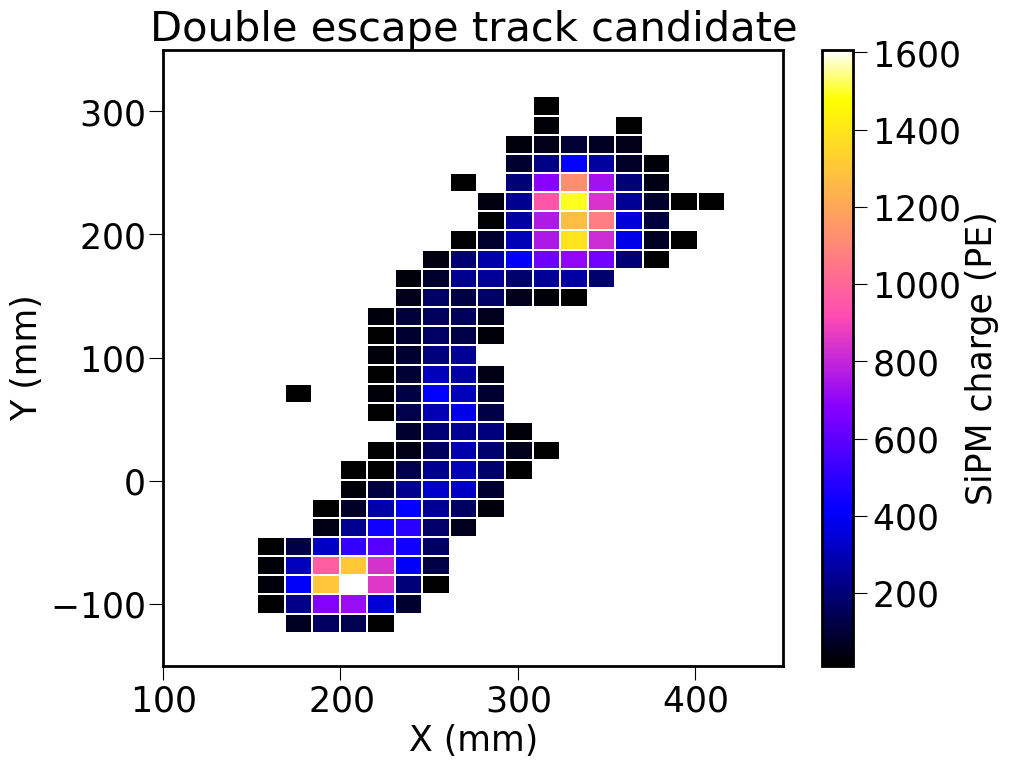

In [7]:
alpha_hits = pd.read_hdf(de_file, 'RECO/Events')
evt = number_of_interest
pitch = 15.55

filtered_evt = alpha_hits[alpha_hits.event == de_evt]
display(filtered_evt)
#filtered_evt = this_evt_true_info[(this_evt_true_info.X > 0)]
#filtered_evt = filtered_evt[(filtered_evt.X < 400)]
#filtered_evt = filtered_evt[(filtered_evt.X > 50)]
#filtered_evt = filtered_evt[(filtered_evt.Y > -200)]
#filtered_evt = filtered_evt[(filtered_evt.Y < 100)]
#filtered_evt = filtered_evt[(filtered_evt.Z > 1600)]
#filtered_evt = filtered_evt[(filtered_evt.Z < 1800)]
filtered_evt = filtered_evt[filtered_evt.Q > 12]

plt.figure(figsize = (10,8))

xx = np.arange(filtered_evt.X.min(), filtered_evt.X.max() + pitch, pitch)
yy = np.arange(filtered_evt.Y.min(), filtered_evt.Y.max() + pitch, pitch)
zz = filtered_evt.Z.unique()

xx_MC = xx
yy_MC = yy
zz_MC = zz

energy_hist = plt.hist2d(filtered_evt.X, filtered_evt.Y, bins=[xx, yy], weights=filtered_evt.Q, cmin=0.0001, edgecolors = 'w', linewidths = 0.05);
plt.xlabel('X (mm)');
#plt.ylabel('Y (mm)');
plt.ylabel('Y (mm)');
cbar = plt.colorbar(energy_hist[3])
cbar.set_label('SiPM charge (PE)')
#plt.hist2d(filtered_evt.X, filtered_evt.Z, bins=[xx, zz], weights=filtered_evt.Q, cmin=0.0001);
#plt.set_xlabel('X (mm)');
#plt.set_ylabel('Z (mm)');
plt.xlim([100, 450])
plt.ylim([-150, 350])


plt.title('Double escape track candidate', fontsize=30)
plt.savefig(f'nice_plots/de_candidate_evt{de_evt}.pdf')

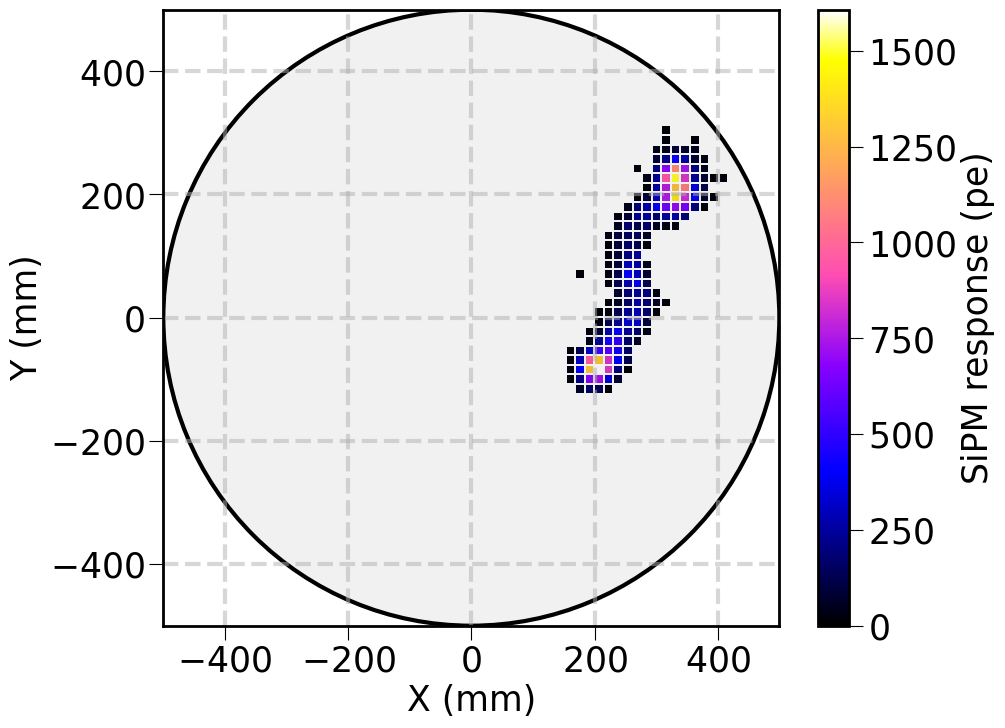

In [8]:
plt.figure(figsize=(10,8))
c = plt.Circle((0,0), 500, facecolor=(.1, .1, .1, .06), edgecolor="k")
plt.gca().add_patch(c)

### REMOVING THE SPURIOUS HITS
filtered_evt = filtered_evt[(filtered_evt.Y > -200)]


energy_hist = plt.hist2d(filtered_evt.X, filtered_evt.Y, bins=[xx, yy], weights=filtered_evt.Q, vmin = 0, cmin=0.0001, edgecolors = 'w', linewidths = 0.05);
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.xticks(np.arange(-400, 401, 200))
plt.yticks(np.arange(-400, 401, 200))
#plt.text( -450, -50, 'Detector Radius\n(r = 500 mm)')
plt.xlim(-500, 500)
plt.ylim(-500, 500)
plt.gca().set_aspect(1)
plt.colorbar().set_label("SiPM response (pe)")
plt.grid()

plt.savefig(f'nice_plots/de_candidate_evt{de_evt}_geometry.pdf')
plt.show()